In [19]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
# Basic complex number
x = 5. + 4j
print(x)

x = complex(5, 4)
print(x)

print(x.real)
print(x.imag)

(5+4j)
(5+4j)
5.0
4.0


In [21]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X + 1j * Y
c = tf.constant(Z.astype(np.complex64))

In [22]:
zs = tf.Variable(c)

In [23]:
ns = tf.Variable(tf.zeros_like(c, tf.float32))

In [24]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [25]:
zs_ = zs * zs + c
not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)))

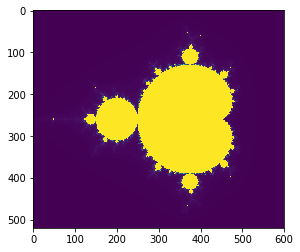

In [27]:
for i in range(200):
    step.run()
plt.imshow(ns.eval())